In [1]:
import os,glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def explore_dir(dir,count=0,f_extensions=None):
    if count==0:
        global n_dir, n_file, filenames, filelocations
        n_dir=n_file=0
        filenames=list()
        filelocations=list()

    for img_path in sorted(glob.glob(os.path.join(dir,'*' if f_extensions is None else '*.'+f_extensions))):
        if os.path.isdir(img_path):
            n_dir +=1
            explore_dir(img_path,count+1)
        elif os.path.isfile(img_path):
            n_file += 1
            filelocations.append(img_path)
            filenames.append(img_path.split("/")[-1])
    return np.array((filenames,filelocations))


In [3]:
tr_img_path = explore_dir('./fruits-360/Training/')[1]
te_img_path = explore_dir('./fruits-360/Test/')[1]

classes = list(set(path.split("/")[-2] for path in tr_img_path))

tr_imgset = np.array(list(map(cv2.imread,tr_img_path)))
te_imgset = np.array(list(map(cv2.imread,te_img_path)))

In [4]:
tr_label = list()
te_label = list()

for i in range(len(tr_img_path)): 
    tr_label.append((list(classes)).index(tr_img_path[i].split('/')[-2]))
    
for i in range(len(te_img_path)):
    te_label.append((list(classes)).index(te_img_path[i].split('/')[-2]))

In [5]:
# data shuffling
tr_img = tr_imgset.copy()
label = np.array(tr_label).copy()

idx = np.random.permutation(len(tr_img))
tr_img = tr_img[idx]
label = label[idx]

Pineapple


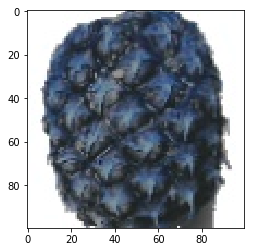

In [6]:
# for test 
idx=900
print(classes[label[idx]])
plt.imshow(tr_img[idx])